<strong>Yalidt Díaz
141394

Cierta empresa requiere determinar el número de unidades a producir de camisetas para asistir a un concierto.Se sabe que una camiseta se venderá en 275.00, que el costo de producirla es 54.50, y que las que sobren deben ser descartadas a un costo de 7.20 c/u. La demanda de camisetas está determinada por la variable aleatoria discreta.

Se pide simular la cantidad de camisetas a producir en 1000 ensayos para determinar la producción que maximiza la utilidad promedio de la empresa.

| Demanda (Q)     | Probabilidad     |
| ------------- | ------------- |
| 500 | .15 |
| 85000 | .40 |
| 100000 | .35 |
| 110000 | .10 |

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import random as rn

In [2]:
#Se crea un dataframe con los valores de demanda y la probabilidad asociada
#Al igual, se calcula la probabilidad acumulada
dt = {'Demanda':[50000,85000,100000,110000],'Probabilidad':[0.15,0.4,0.35,0.1]}
demanda_df = pd.DataFrame(data=dt)
demanda_df

,Demanda,Probabilidad
0,50000,0.15
1,85000,0.40
2,100000,0.35
3,110000,0.10


In [3]:
#FUNCIONES
#Esta funcion recibe un numero aleatorio y una lista->Indica el indice de la lista que recibe
def funcion_1(random, lista):
    brk = True
    i = 0
    while brk == True:
        if random >= lista[i]:
            i = i + 1
        else:
            brk = False
        i = i
    return i

In [4]:
i=0.35
lista=demanda_df['Probabilidad']
indice=funcion_1(i,lista)
indice

1

In [5]:
demanda_df['acum'] = demanda_df['Probabilidad'].cumsum()
lista = demanda_df['acum']
demanda_df['acum']

0    0.15
1    0.55
2    0.90
3    1.00
Name: acum, dtype: float64

In [6]:
#Indica la demanda que esta asociada al indice calculado con la funcion_1, np.random.random(0,1)
def calc_demanda(rango, lista):
    indice = funcion_1(np.random.random(),rango)
    q = lista[indice]
    return q

#Calcula produccion con la lista de cantidades,se elegir aleatoriamente entre los escenarios posibles
def calc_produccion(lista):
    produccion = rn.choice(lista)
    return produccion

#Definimos los Ingresos
def calc_ingresos(precio_venta, prod, q):
    ingresos = precio_venta * min(prod,q)
    return ingresos

#Definimos los egresos
def calc_egresos(costo_venta, prod, q, costo_descarte):
    if prod > q:
        descarte=(prod-q)*costo_descarte
    else:
        descarte=0
    egresos=(costo_venta*prod)+descarte
    return egresos

#Calculo de la utilidad
def calc_utilidad(ingresos, egresos):
    utilidad = ingresos - egresos
    return utilidad

In [7]:
#Simulacion->simula n_veces la utilidad calculada
def simulacion(num_iteraciones, lista_demanda, lista_acum, p_v, c_v, c_d):
    x = 0
    Tabla_simulacion = pd.DataFrame(columns=['Utilidad','Produccion','Demanda','Ingresos','Egresos'])#Titulos/Tabla
    for x in range(0,num_iteraciones):
        produccion = calc_produccion(lista_demanda)
        q = calc_demanda(lista_acum,lista_demanda)
        ingresos = calc_ingresos(p_v,produccion, q)
        egresos = calc_egresos(c_v,produccion,q,c_d)
        utilidad = calc_utilidad(ingresos, egresos)
        nl = { 'Utilidad':utilidad, 'Produccion':produccion, 'Demanda':q,'Ingresos':ingresos, 'Egresos':egresos}
        Tabla_simulacion = Tabla_simulacion.append(nl, ignore_index=True) #Junta todo en una sola tabla
    Tabla_simulacion.to_csv('Simulacion.csv')#Opcion de guardar en Excel
    return Tabla_simulacion

In [8]:
#Promedio de utilidad óptima y del riesgo
def utilidad_optima(datafr):
    agg = datafr.groupby(['Produccion']).mean().round()#Promedio por grupos(en este caso por Escenarios de Produccion)
    del agg['Demanda']#Borramos las columnas que no nos interesan
    del agg['Ingresos']
    del agg['Egresos']
    return agg

def riesgo(datafr):
    dsv = datafr.groupby(['Produccion']).std().round()##Promedio por grupos(en este caso por Escenarios de Produccion)
    del dsv['Demanda']#Borramos las columnas que no nos interesan
    del dsv['Ingresos']
    del dsv['Egresos']
    return dsv

In [9]:
#Datos
precio_venta = 275
costo_venta = 54.5
costo_descarte = 7.2

In [10]:
resultado = simulacion(1000,demanda_df['Demanda'],demanda_df['acum'],precio_venta,costo_venta,costo_descarte)

In [11]:
resultado

,Utilidad,Produccion,Demanda,Ingresos,Egresos
0,18742500.0,85000.0,110000.0,23375000.0,4632500.0
1,17817000.0,100000.0,85000.0,23375000.0,5558000.0
2,17200000.0,110000.0,85000.0,23375000.0,6175000.0
3,24255000.0,110000.0,110000.0,30250000.0,5995000.0
4,11025000.0,50000.0,85000.0,13750000.0,2725000.0
5,11025000.0,50000.0,50000.0,13750000.0,2725000.0
6,17817000.0,100000.0,85000.0,23375000.0,5558000.0
7,11025000.0,50000.0,100000.0,13750000.0,2725000.0
8,11025000.0,50000.0,100000.0,13750000.0,2725000.0
9,21433000.0,110000.0,100000.0,27500000.0,6067000.0


In [12]:
#Promedio de utilidades segun los rangos de produccion
Tabla_final = utilidad_optima(resultado)
Tabla_final

,Utilidad
Produccion,
50000.0,11025000.0
85000.0,17036833.0
100000.0,18318566.0
110000.0,17852096.0


Text(0, 0.5, 'Utilidad $')

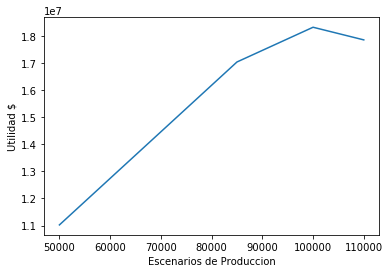

In [18]:
import matplotlib.pyplot as plt
plt.plot(Tabla_final)
plt.show
plt.xlabel('Escenarios de Produccion')
plt.ylabel('Utilidad $')

Según la simulacion montecarlo se puede asegurar que la empresa optimiza su utilidad si produce 100,000 unidades.

In [13]:
#Riesgos segun los rangos de produccion
Tabla_riesgo = riesgo(resultado)
Tabla_riesgo

,Utilidad
Produccion,
50000.0,0.0
85000.0,3740825.0
100000.0,4583378.0
110000.0,5012042.0


De acuerdo a los niveles de riesgo, el menor riesgo se encuentra cuando se producen 85,000 unidades. Se quedaría con este nivel de producción  si la empresa fuera conservadora, debido a que se optimiza con 100,000 unidades.

Text(0, 0.5, 'Riesgo Utilidad')

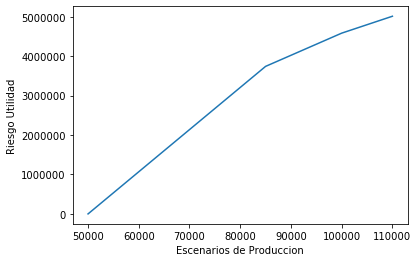

In [19]:
import matplotlib.pyplot as plt
plt.plot(Tabla_riesgo)
plt.show
plt.xlabel('Escenarios de Produccion')
plt.ylabel('Riesgo Utilidad')

Bibliografía
Los datos fueron tomados de un ejercicio de licenciatura en el ITAM de la materia  "Modelado Computacional", con la Dra. Alejandra Barrera.